# Paso 4. Análisis exploratorio de datos (Python)
## Familiarización con los DataFrames y limpieza de datos
Contamos con dos nuevos archivos CSV. Vamos a familiarizarnos con ellos.
### Importación de los archivos


In [1]:
# Primero cargamos nuestro querido pandas, algunas librerías para graficar y los archivos.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_2 = pd.read_csv('/datasets/project_sql_result_04.csv')

### Estudio y familiarización de los datos

In [2]:
# Vamos a darle un vistazo a las primeras columnas.
# Primera tabla. Contiene a las compañías y sus viajes.
print(df_1.head()) 
print()

# Segunda tabla. Contiene los destinos y el promedio de viajes.
print(df_2.head())

                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000


La __primera tabla__ contiene 'company_name': nombre de la empresa; y 'trips_amount': el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. __Flash Cab__ tuvo muchísimos más viajes que la competencia durante esos dos días; hay una diferencia de más de 8000 viajes entre ellos y __Taxi Affiliation Services__, que es el segundo lugar.

La __segunda tabla__ incluye dos columnas. La primera es 'dropoff_location_name': barrios de Chicago donde finalizaron los viajes; y 'average_trips': el promedio de viajes que terminaron en cada barrio en noviembre de 2017. Por algún motivo los datos de 'average_trips' tienen seis números decimales. En cuanto a destinos, __Loop__ es el barrio preferido, seguido de cerca por  __River North__ y más lejos tenemos a __Streeterville__. 

### Aseguramiento de que el tipo de datos es correcto

In [3]:
# Veamos el tipo de datos, número de filas, etc. del primer DataFrame.

print(df_1.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None



Las columnas respetan la convención snake_case y los tipos de datos están correctos. No hay datos nulos en el primer DataFrame.

In [4]:
# Veamos el tipo de datos, número de filas, etc. del segundo DataFrame.

print(df_2.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None



Si bien en el segundo DataFrame no hay nulos y se respeta la convención snake_case en las columnas, como vimos anteriormente los datos de 'average_trips' tienen seis decimales. Tanta precisión es innescesaria y podría confudirnos. Hagamos algo al respecto. Estamos analizando el número promedio de viajes y las diferencias son de cientos o miles de viajes promedio entre cada destino. Vamos a dejar un solo decimal:

In [5]:
# Con la función 'round' redondeamos a un sólo decimal.
df_2['average_trips'] = df_2['average_trips'].round(1)

# Pequeña comprobación
print(df_2.info())
print()
print(df_2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None

  dropoff_location_name  average_trips
0                  Loop        10727.5
1           River North         9523.7
2         Streeterville         6664.7
3             West Loop         5163.7
4                O'Hare         2546.9


Con esta breve identificación y limpieza de datos, estamos listos para empezar nuestro análisis exploratorio de datos. 

## Inicio del análisis exploratorio
### Identificación de los 10 principales barrios en términos de finalización del recorrido
Veamos cuáles son los barrios más populares como destino.

In [6]:
# Creamos la variable 'top_destinations'.
top_destinations = df_2.head(10)
print(top_destinations)


  dropoff_location_name  average_trips
0                  Loop        10727.5
1           River North         9523.7
2         Streeterville         6664.7
3             West Loop         5163.7
4                O'Hare         2546.9
5             Lake View         2421.0
6            Grant Park         2068.5
7         Museum Campus         1510.0
8            Gold Coast         1364.2
9    Sheffield & DePaul         1259.8


Gracias a la gráfica podemos apreciar cuatro claros preferidos: __Loop, River North, Streeterville y West Loop__.

### Realización de gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
A continuación graficaremos los destinos más populares durante el mes de noviembre de 2017 y las compañías con más viajes los días 15 y 16 de noviembre de 2017.

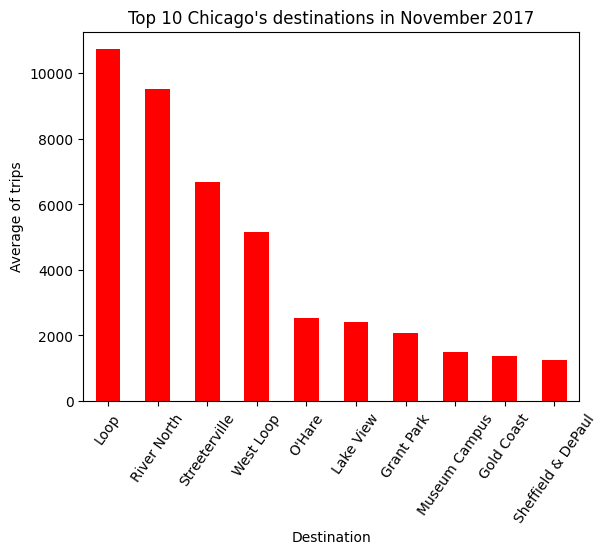

La cantidad total de viajes promedio durante noviembre de 2017 es de 56395.7.

Los cuatro destinos principales concentran el 56.9% del total de viajes promedio.


In [7]:
# Vamos a graficar la información anterior con ayuda de la variable 'top_destinations'
top_destinations.plot(kind = 'bar',
                     x = 'dropoff_location_name',
                     y = 'average_trips',
                     title = "Top 10 Chicago's destinations in November 2017",
                     xlabel = 'Destination',
                     ylabel = "Average of trips",
                     legend = False,
                     color = 'red',
                     rot = '55'
                     )
plt.show()

# Calculemos la cantidad total de viajes promedio.
total_average_destinations = df_2['average_trips'].sum().round(1) # Lo mismo, con 'round' evitamos decimales innescesarios.

# Imprimamos la cantidad total de viajes promedio. 
print(f'La cantidad total de viajes promedio durante noviembre de 2017 es de {total_average_destinations}.')
print()

# Vamos a calcular qué porcentaje abarcan los primeros cuatro destinos.
top_4_sum = top_destinations.head(4)['average_trips'].sum().round(1)
percentage_top4 = ((top_4_sum / total_average_destinations) * 100).round(1)

#Impresión de los resultados.
print(f"Los cuatro destinos principales concentran el {percentage_top4}% del total de viajes promedio.")


__The Loop__ fue el destino preferido. Es una zona turística popular en Chicago, así como __River North__, __Streeterville__ y __West Loop__. Su éxito tiene sentido. Según una pequeño vistazo en Google todas estas áreas son céntricas. Durante ese mes, las personas viajaron principalmente al centro de Chicago.

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


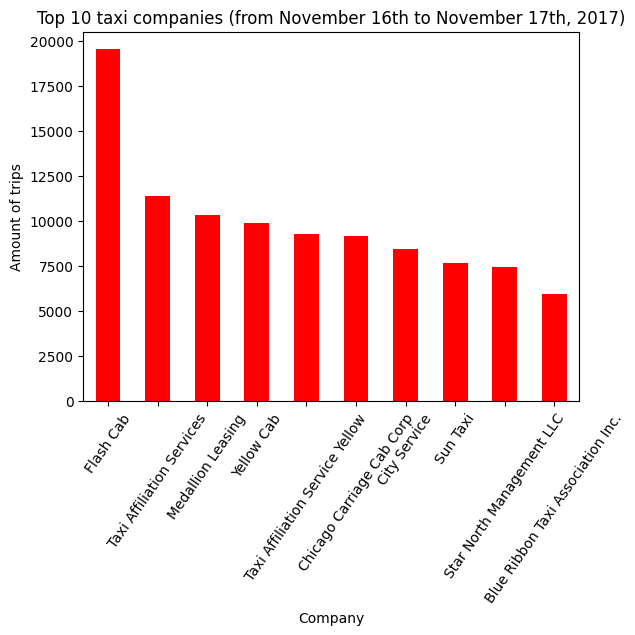

La cantidad total de viajes es de 137311.

Flash Cab concentra el 14.2% del total de viajes.


In [8]:
# Creemos la variable 'top_companies'.
top_companies = df_1.head(10)
print(top_companies)

# Vamos a graficar la información anterior con ayuda de la variable 'top_companies'
top_companies.plot(kind = 'bar',
                     x = 'company_name',
                     y = 'trips_amount',
                     title = "Top 10 taxi companies (from November 16th to November 17th, 2017)",
                     xlabel = 'Company',
                     ylabel = "Amount of trips",
                     legend = False,
                     color = 'red',
                     rot = '55'
                     )
plt.show()
total_trips = df_1['trips_amount'].sum()
print(f'La cantidad total de viajes es de {total_trips}.')

# Calculemos que porcentaje de viajes pertenece a Flash Cab.
flash_cab_percentage = ((19558 / total_trips) * 100).round(1)
print()

#Impresión de los resultados.
print(f"Flash Cab concentra el {flash_cab_percentage}% del total de viajes.")



Durante los días 16 y 17 de noviembre de 2017, hay un claro ganador: __Flash Cab__. Valdría la pena averiguar cómo lo logran. ¿Ofrecen descuentos por viajar a esa zona? ¿Sus precios en general son mejores? ¿El estado de sus unidades es mejor? ¿Cuentan con mejores conductores?

## Conclusión
El mercado de viajes durante __noviembre de 2017__ en __Chicago__ estuvo concentrado en pocas empresas y pocos barrios. Una compañía nueva podría concentrarse en la parte de mercado que tiene __Flash Cab__ a través de ofrecer viajes a las zonas más populares (__Loop__, __River North__, etc.)

# Paso 5. Prueba de hipótesis (Python)
##  Familiarización con los DataFrames y limpieza de datos
Tenemos un nuevo DataFrame. Es el resultado de la última consulta que hicimos con las tablas de SQL. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Solamente contiene los días que fueron sábados. Vamos a echarle un vistazo.
### Importación del archivo, estudio y familiarización

In [9]:
df_3 = pd.read_csv('/datasets/project_sql_result_07.csv')

print(df_3.info())
print()
print(df_3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0


No hay datos nulos y las columnas respetan la convención snake_case. Como vamos a trabajar con las fechas y con segundos, tendremos que modificar los tipos de datos. Como sabemos, el valor 'Good' en 'weather_conditions' hace referencia a días sin lluvia; el valor 'Bad' hace referencia a días con lluvia.

- La columna 'start_ts' debería tener datos de tipo datetime.

- La columna 'weather_conditions' está bien.

- La columna 'duration_seconds' tiene decimales, los cuales no son necesarios.

### Limpieza de los datos
Primero convertiremos la columna 'start_ts' a datetime para poder extraer sus datos.

In [10]:
# Usaremos el método de pandas 'to_datetime'.
df_3['start_ts'] = pd.to_datetime(df_3['start_ts'])

# Pequeña comprobación.
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB
None


A continuación convertiremos la columna 'duration_seconds' a enteros

In [11]:
# Nos podemos deshacer de los decimales al cambiar el tipo de datos a enteros.
df_3['duration_seconds'] = df_3['duration_seconds'].astype(int)

# Pequeña comprobación.
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB
None


Vamos a comprobar si todos los días de la semana que incluye este DataFrame son sábados.

In [12]:
# Con 'dt.day_name' podemos extraer los días de la semana ya que el tipo de dato es ahora de tipo datetime. 
# Almacenaremos los días en la columna 'day_of_the_week'
df_3['day_of_week'] = df_3['start_ts'].dt.day_name()

# Vamos a contar los registros por día e imprimirlos.
day_counts = df_3['day_of_week'].value_counts()
print(day_counts)


Saturday    1068
Name: day_of_week, dtype: int64


Hay 1068 sábados. Ese mismo número es el total de filas. El DataFrame solo incluye sábados. Filtremos con base la información de 'weather_conditions'.

In [13]:
# Filtrado de los sábados lluviosos.
saturday_rain = df_3[df_3['weather_conditions'] == 'Bad']

# Filtrado de los sábados no lluviosos.
saturday_no_rain = df_3[df_3['weather_conditions'] == 'Good']  


## Prueba de hipótesis

### Hipótesis

Ésta es la hipótesis que vamos a poner a prueba:

"__La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"__.

### Planteamiento de hipótesis
- Hipótesis nula: 

"No hay diferencia significativa en la duración promedio entre sábados lluviosos y otros días".

- Hipótesis alternativa:

"Existe diferencia significativa en la duración promedio".
 
Ya que tenemos los datos de sábados con lluvia y sin lluvia, podemos comparar las muestras. Usaremos una __prueba t de Student__ para comparar las medias de ambos registros porque comparamos dos grupos independientes (viajes en sábados lluviosos y no lluviosos) y las mediciones no son exactamente de los mismos sujetos (usuarios).

Para comprobar si 'equal_var' pasa como True o False (que las varianzas sean iguales o no), podemos echar un ojo a las varianzas.

In [14]:
import numpy as np

# Calcular varianzas
var_rain = np.var(saturday_rain)
var_no_rain = np.var(saturday_no_rain)

print(f"Varianza de los sábados lluviosos: {var_rain:}")
print(f"Varianza de los sábados no lluviosos: {var_no_rain:}")

Varianza de los sábados lluviosos: duration_seconds    517403.563302
dtype: float64
Varianza de los sábados no lluviosos: duration_seconds    575732.93085
dtype: float64


Las varianzas lucen similares, además las muestras se toman de poblaciones con parámetros similares. Vamos a realizar __la prueba t__.

In [15]:
from scipy import stats as st
import numpy as np

# Datos de duración de viajes.
saturday_rain = df_3[df_3['weather_conditions'] == 'Bad']['duration_seconds']
saturday_no_rain = df_3[df_3['weather_conditions'] == 'Good']['duration_seconds']

# Nivel de significación estadística.
alpha = 0.05  

# Prueba t para muestras independientes con varianzas similares
results = st.ttest_ind(saturday_rain, saturday_no_rain, equal_var=True)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Hay diferencia significativa en la duración de los viajes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay diferencia significativa.")

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: Hay diferencia significativa en la duración de los viajes.


### Conclusión

Rechazamos la hipótesis nula. La diferencia del promedio de duración en segundos es considerablemente alta a nivel estadístico. La compañía puede anticipar viajes más largos los sábados con lluvia y ajustar sus servicios y ofertas con base en ello.

Podría ser que la lluvia provoque más tráfico, que hace que los conductores conduzcan más lento o que los usuarios prefieran usar más un taxi, o una combinación de ésas y otras variables. Los datos que tenemos en este DataFrame no nos permiten saber si con lluvia el número de viajes es mayor o no; ésa hubiera sido una hipótesis interesante de comprobar.